<a href="https://colab.research.google.com/github/MohamedAlaaEldinFarghaly/Deep-Learning-projects/blob/master/Data_Augmentation_by_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Data Augmentation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_datagen.fit(X_train)

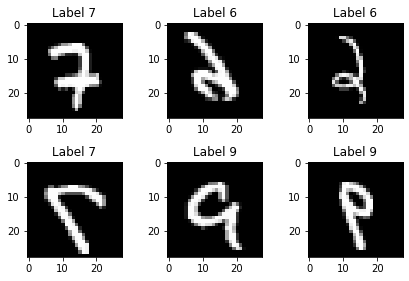

In [ ]:
# transform the data
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
  for i in range(0, 6):
    plt.subplot(2,3,i+1)
    plt.title('Label {}'.format(label[i]))
    plt.imshow(img[i].reshape(28, 28), cmap='gray')
  break
plt.tight_layout()
plt.show()

# 2-Convolution Autoencoder

###       2-a Generating low-resolution images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist 
(X_train,y_train), (X_test,y_test)= mnist.load_data()

from keras.layers import  Conv2D, MaxPooling2D, Dropout, UpSampling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import backend as k

#from scipy.misc import imresize   # for resizing images
from PIL import Image

In [ ]:
def reshape(x):
  """Reshape images to 14*14"""
  images=[]
  for i in range(0,x.shape[0]):
    img = Image.fromarray(x[i]).resize((14,14))
    img.show()
    y=np.array(img)
    images.append(y)
  return images

60000
(60000, 14, 14)


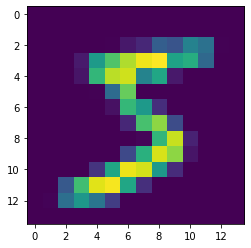

In [ ]:
print(X_train.shape[0])
m= np.array(reshape(X_train))
print(np.shape(m))
plt.imshow(m[0])

In [ ]:
XX_train = np.array(reshape(X_train))
XX_test = np.array(reshape(X_test))

##    2-b Scaling

In [ ]:
XX_train = XX_train/255
X_train = X_train/255

XX_test = XX_test/255
X_test = X_test/255

### autoencoder

In [ ]:
batch_size = 128
epochs = 40
input_shape = (14,14,1)

In [ ]:
# define autoencoder
def make_autoencoder(input_shape):
  generator = Sequential()
  generator.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
  generator.add(MaxPooling2D(pool_size=(2, 2)))

  generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  
  generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  generator.add(UpSampling2D((2, 2)))
  
  generator.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  generator.add(UpSampling2D((2, 2)))
  
  generator.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
  
  return generator

We are using mean_squared_error as the loss, as we want the model to predict th pixel values

In [ ]:
autoencoder = make_autoencoder(input_shape)

# compile auto encoder
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0002, beta_1=0.5))

# auto encoder summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 64)       

In [ ]:
# fit autoencoder
autoencoder_train = autoencoder.fit(XX_train.reshape(-1,14,14,1), 
                                    X_train.reshape(-1,28,28,1),
                                    batch_size=batch_size, 
                                    epochs=epochs, verbose=1,
                                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 310s 6ms/step - loss: 0.0282 - val_loss: 0.0094
Epoch 2/40
48000/48000 [==============================] - 314s 7ms/step - loss: 0.0075 - val_loss: 0.0062
Epoch 3/40
48000/48000 [==============================] - 309s 6ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 4/40
48000/48000 [==============================] - 315s 7ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 5/40
48000/48000 [==============================] - 303s 6ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 6/40
48000/48000 [==============================] - 305s 6ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/40
48000/48000 [==============================] - 306s 6ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/40
48000/48000 [==============================] - 307s 6ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/40
48000/48000 [==============================] - 308s 6ms/step - loss: 0.0031 - val_loss: 0.0

**Loss plot**


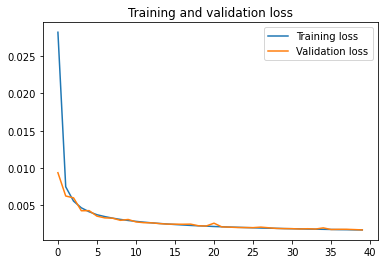

Input


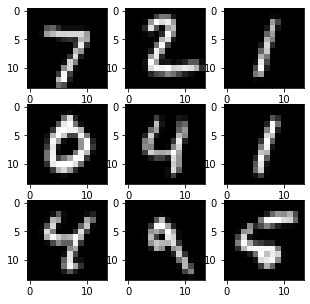

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_ = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs_, loss, label='Training loss')
plt.plot(epochs_, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print('Input')
plt.figure(figsize=(5,5))

for i in range(9):
  plt.subplot(331 + i)
  plt.imshow(np.squeeze(XX_test.reshape(-1,14,14)[i]), cmap='gray')
plt.show()

test Result

GENERATED


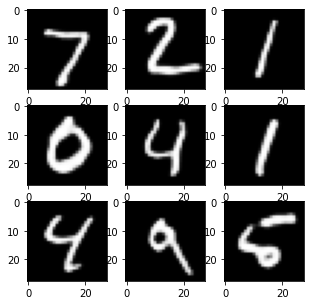

In [ ]:
print('GENERATED')
plt.figure(figsize=(5,5))
for i in range(9):
  pred = autoencoder.predict(XX_test.reshape(-1,14,14,1)[i:i+1], verbose=0)
  plt.subplot(331 + i)
  plt.imshow(pred[0].reshape(28,28), cmap='gray')
plt.show()